# Diabetes Risk Prediction using Machine Learning

### 💡 Problem:
Diabetes is a chronic disease affecting millions worldwide. Early detection can help patients manage their condition and avoid complications.

### 🎯 Goal
In this project, we’ll use patient data to:
- Explore patterns among health metrics (BMI, Glucose, Age)
- Understand relationships using visual analysis
- Build a machine learning model to predict diabetes risk

Dataset used: Pima Indians Diabetes Dataset

# 1. Data Collection

## 📩Importing the dependancies¶

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Settings
sns.set(style='darkgrid')

 ## 🧬Data Loading

In [2]:
df=pd.read_csv('../data/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. EDA & Data Preprocessing 

## 🕵️Inspect the data

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 🔍Observation:

1. Dataset has 768 rows × 9 columns.
2.  Outcome = 1 means diabetic, 0 means non-diabetic.
3.  Features include Glucose, BMI, Insulin, Age, etc.
4.  We can see that columns like blood pressure, glucose, BMI have minimum value 0.

Think about these features:
- BloodPressure: Can a living person have a blood pressure of 0 mm Hg? No.
- BMI (Body Mass Index): Can a living adult have a BMI of 0? No.

These zeros likely indicate missing measurements; we should replace them before analysis. 

## ✂️Data Cleaning

Some columns have 0 values instead of missing data — we’ll replace them with `NaN` and impute.

In [7]:
cols_with_zero=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols_with_zero]=df[cols_with_zero].replace(0,np.nan)

In [8]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
df.fillna(df.median(),inplace=True)

## 📊EDA 

### ❓How many patients are diabetic vs non-diabetic?

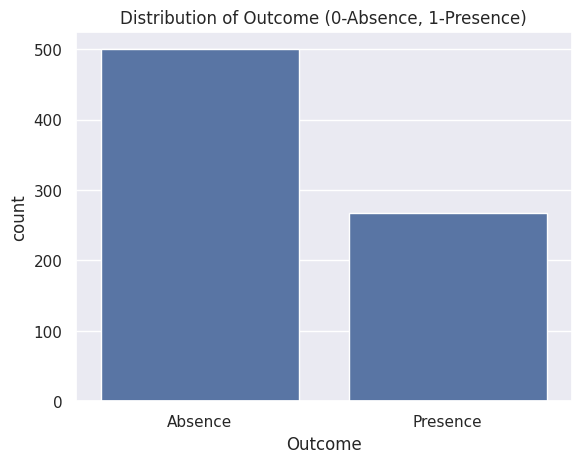

In [10]:
sns.countplot(x='Outcome',data=df)
plt.title("Distribution of Outcome (0-Absence, 1-Presence)")
plt.xticks(ticks=[0, 1], labels=['Absence', 'Presence'])

plt.show()

#### 🔍Observation:
* The dataset shows a clear class imbalance — the number of individuals without diabetes (Outcome = 0) is significantly higher than those with diabetes (Outcome = 1).

### ❓How are the features distributed? Any outliers? 

In [11]:
features_to_plot =['Glucose', 'BloodPressure', 'Insulin','BMI', 'Age']

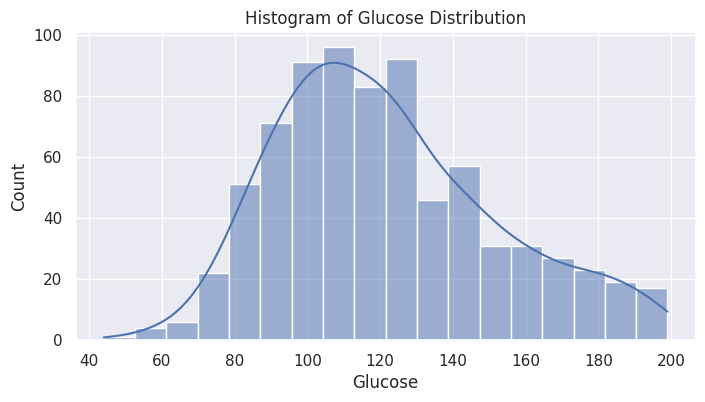

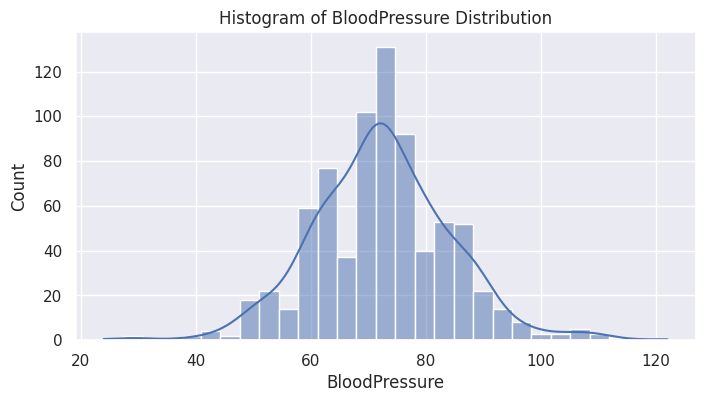

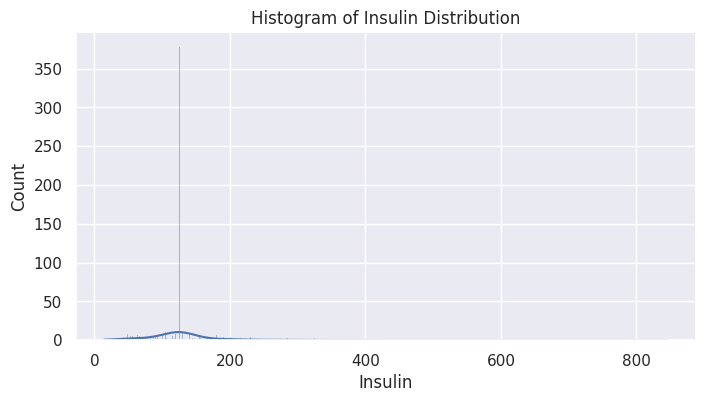

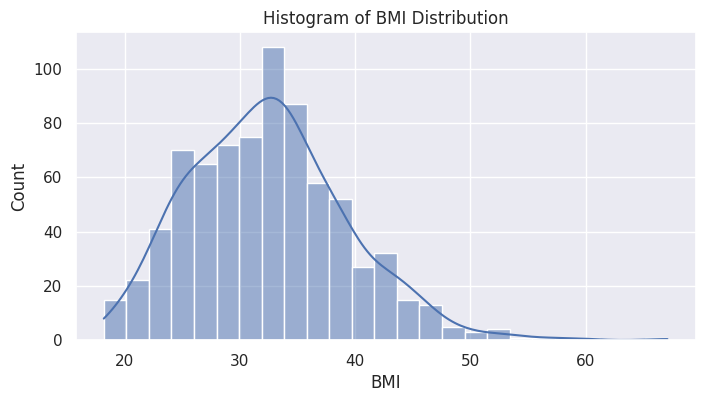

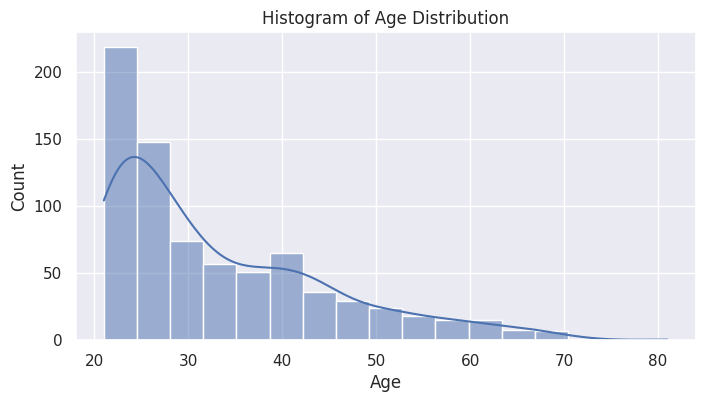

In [12]:
for feature in features_to_plot:

    plt.figure(figsize=(8,4))
    
    sns.histplot(df[feature],kde=True)
    plt.title(f'Histogram of {feature} Distribution')

    plt.show()

#### 🔍Observation:
* Glucose peak around 100-120mg/dL, with some extreme values.
* BMI is mostly around 20-40 with few extreme values
* Age is spread evenly from 20-70


### ❓Which features clearly distinguish between two classes?

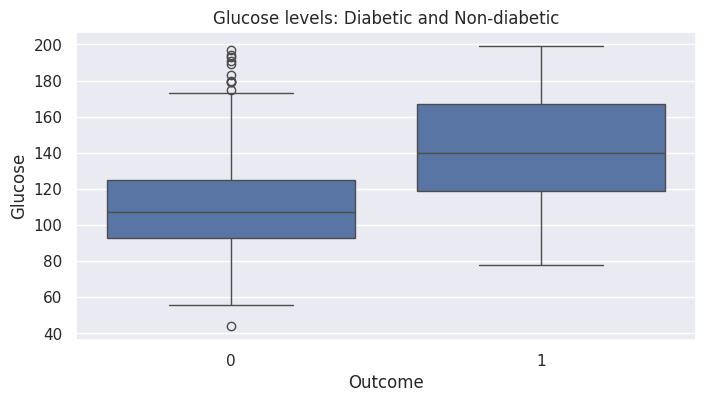

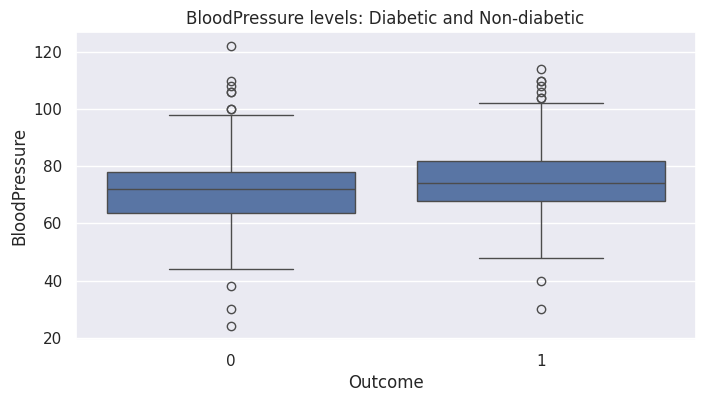

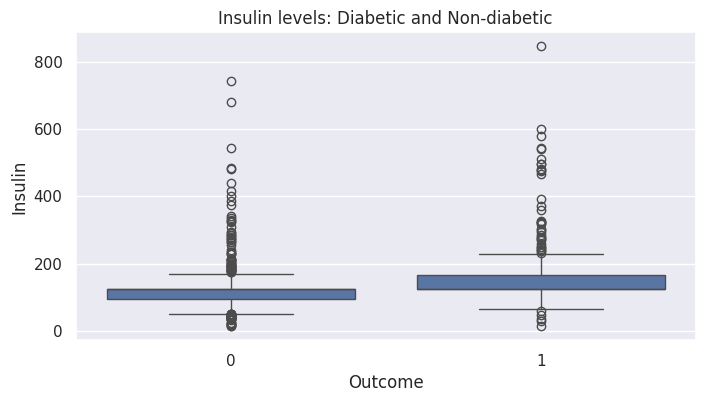

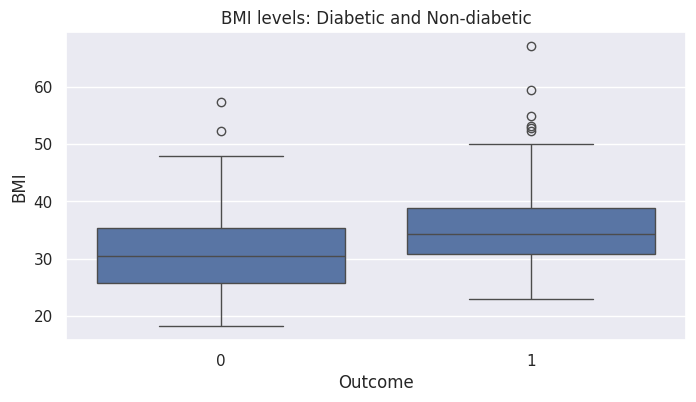

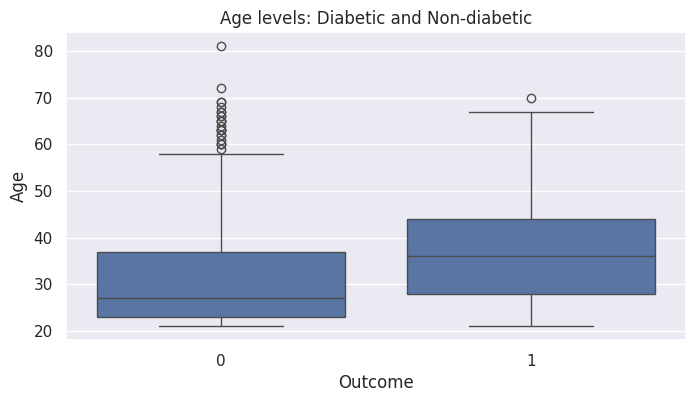

In [13]:
for feature in features_to_plot:
    plt.figure(figsize=(8,4))
    
    sns.boxplot(x='Outcome',y=feature, data=df)
    plt.title(f'{feature} levels: Diabetic and Non-diabetic')

    plt.show()


#### 🔍Observation:
* Glucose and Insulin have clear seperation between diabetic and non-diabetic.
* Age and BMI also have almost clear seperation between 2 outcomes.

### ❓Are there strong correlations between features that can help us understand patterns or select features for our model?

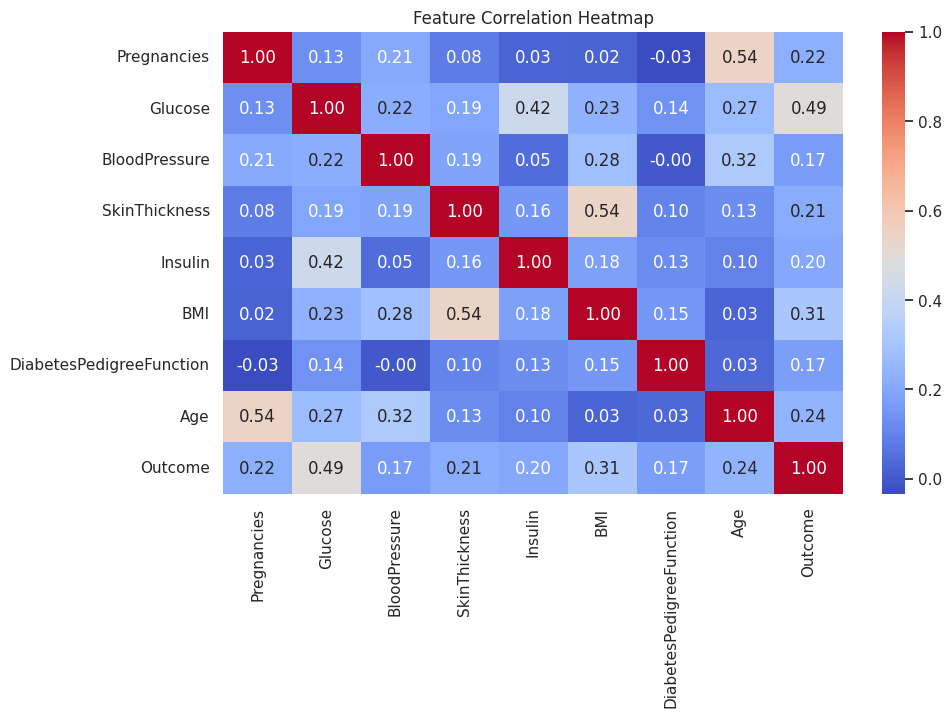

In [14]:
plt.figure(figsize=(10,6))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Heatmap')
plt.show()

In [15]:
df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

#### 🔍Observation:
* Glucose has the strongest positive correlation with Outcome (diabetes). This means higher glucose values are strongly associated with diabetic patients.
* BMI also shows a moderate positive correlation with Outcome. So patients with higher BMI tend to be more likely diabetic.
* Age,Insulin have a small positive correlation.
* Blood Pressure and Pregnancies show weak correlation with diabetes outcome. While they contribute to overall health risk, they’re not strong standalone predictors for diabetes.

### ❓How are insulin levels related to blood glucose levels among diabetic and non-diabetic individuals?

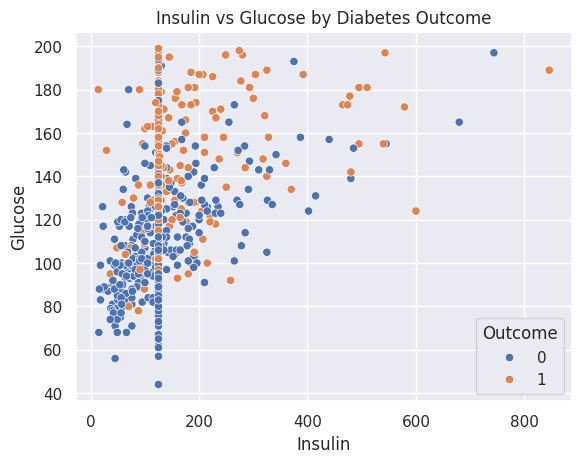

In [16]:
sns.scatterplot( x='Insulin',y='Glucose', hue='Outcome',data=df)
plt.title("Insulin vs Glucose by Diabetes Outcome")
plt.show()

#### 🔍Observation:
* A visible horizontal band appears near Insulin value around 150 (median), caused by imputed values.This indicates a high proportion of missing insulin data originally.
* Non-diabetic patients (blue) generally lie in the moderate insulin + moderate glucose zone.
* Diabetic patients (yellow) show high glucose levels with either moderate or high insulin — consistent with insulin resistance.

### ❓Do higher BMI patients tend to have higher glucose levels?

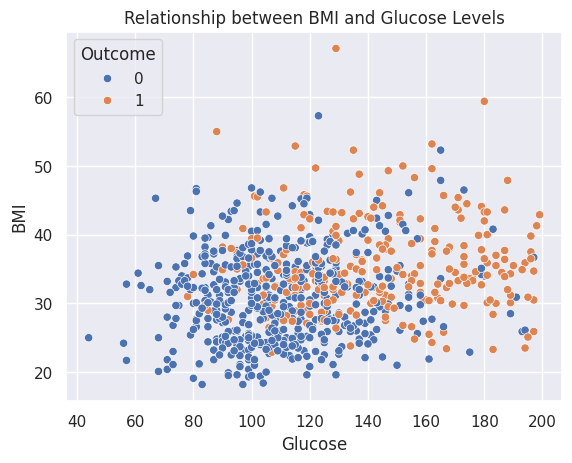

In [17]:
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome',data=df)
plt.title("Relationship between BMI and Glucose Levels")

plt.show()

#### 🔍Observation:
* Diabetic patients (yellow) cluster around higher glucose and higher BMI regions.
* Non-diabetic patients (blue) are mostly found in the lower glucose range (<120) and moderate BMI (<30).

### ❓Do older patients tend to have higher glucose levels?

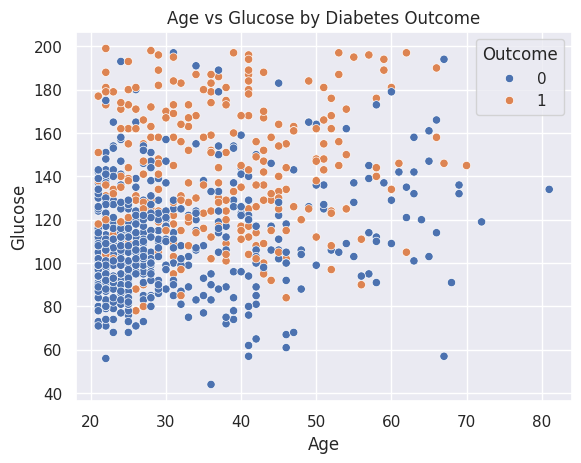

In [18]:
sns.scatterplot(x='Age', y='Glucose', hue='Outcome',data=df)
plt.title("Age vs Glucose by Diabetes Outcome")

plt.show()

#### 🔍Observation:
* Blue (non-diabetic) dots spread widely, especially below glucose = 130.
* Yellow(diabetic) dots clustered more often at higher glucose values and often in older age ranges (above 40–45)
* However, glucose levels vary widely at all ages — meaning age alone doesn’t cause diabetes, but risk rises with it.

## 🛠 Data Preprocessing

In [19]:
# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Model Training 

In [20]:
# Train
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# 4. Model Evaluation 

In [21]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533
[[82 17]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



# 5. Results 

1. The **Logistic Regression** model achieved an overall accuracy of **~75%**, which aligns with standard benchmarks for this dataset.
   
2.  Precision and recall scores show that the model performs better at identifying non-diabetic individuals, while occasionally missing some diabetic cases — a common outcome due to class imbalance.

3. Core predictors identified: **Glucose,BMI,Age,Insulin**

# 🖊 Next Steps and Improvements 

1. **Handle Class Imbalance**:
   Apply SMOTE or class weighting to give equal importance to diabetic cases. This can improve recall and reduce bias toward the majority class.

2. **Feature Engineering**:
    Create new combined features such as: Glucose × BMI (metabolic load), Age × BloodPressure (age-related vascular stress). Feature interactions can reveal more complex relationships.

3. **Model Upgrades**:
    Try Random Forest, XGBoost for non-linear patterns. Compare accuracy, F1-score, and interpretability trade-offs.

4. **Model Interpretation**:
    Visualize logistic regression coefficients to explain which features most increase diabetes risk. Add SHAP or feature importance plots in future versions for transparency.

5. **Deployment**:
    Convert this notebook into a small web app or dashboard where users can input patient data and see predicted risk.